<a href="https://colab.research.google.com/github/leandrobarbieri/python-datascience-ml/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering
>777 observações sobre as 18 variáveis de universidades públicas e privadas, que possuem features bem diferentes que podem ser usadas para identificação de clusters. Esse tipo de algoritimo é não supervisionado pois não depende de um target para realizar o treinamento do modelo

- Private: Um fator com níveis Não e Sim, indicando universidade privada ou pública.<br>
- Apps: Número de inscrições recebidas.<br>
- Accept: Quantidade de inscrições aceitas.<br>
- Enroll: Número de estudantes matriculados.<br>
- Top10perc: Percentual de novos estudantes vindo do grupo de 10% melhores do segundo grau.<br>
- Top25perc: Percentual de novos estudantes vindo do grupo de 25% melhores do segundo grau.<br>
- F.Undergrad: Número de alunos de graduação em tempo integral.<br>
- P.Undergrad Número de alunos de graduação em tempo parcial.<br>
Outstate: Aulas fora do estado.<br>
- Room.Board: Custos da sala.<br>
- Books: Custos de livros estimados.<br>
- Personal: Estimativa de gastos por pessoa.<br>
- PhD: Percentual de PHD's na universidade.<br>
- Terminal: Percentual da faculdade com graduação.<br>
- S.F.Ratio: Taxa estudantes/faculdade.<br>
- perc.alumni: Percentual dos ex-alunos que doam.<br>
- Expend: Despesas da instituição por aluno.<br>
- Grad.Rate: Taxa de graduação<br>

In [1]:
# Esse tipo de algoritimo não usa um rotulo para treinamento
# Ele agrupa os elementos a a partir da localização dos centroides
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# carrega os dados e faz da primeira coluna o indice do dataframe
df = pd.read_csv("https://raw.githubusercontent.com/leandrobarbieri/python-datascience-ml/main/5.%20Machine%20Learning/K-Means-Clustering/College_Data", index_col=0)
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


# Análise Exploratória

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


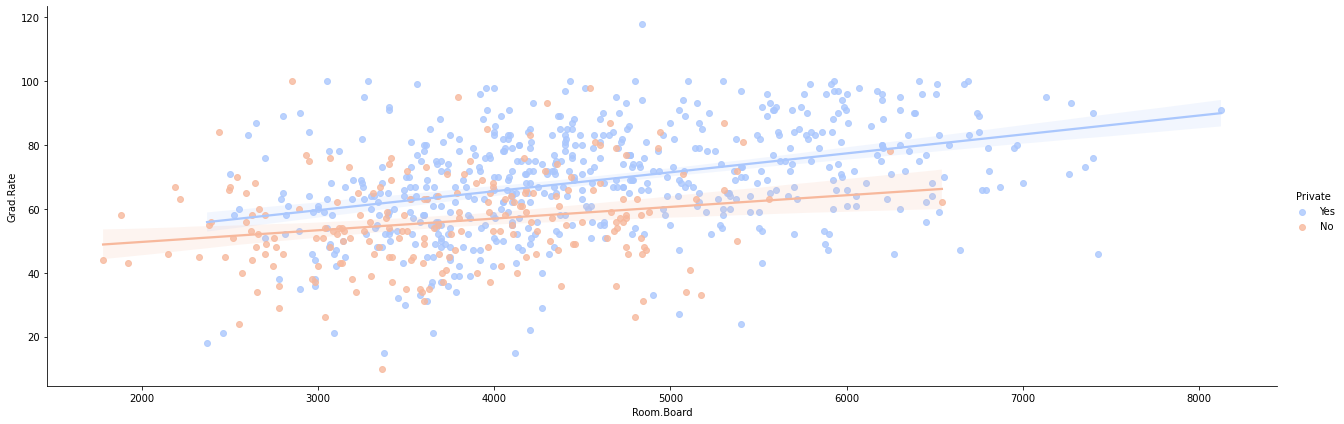

In [3]:
# Custo da sala pela taxa de gradução: Quanto mais se gasta com a sala maior é a taxa de graduação
# Privado gasta mais e tem uma corelação mais linear entre gasto e taxa de graduação do que a publica
sns.lmplot(x="Room.Board", y="Grad.Rate", data=df, hue="Private", palette='coolwarm', size=6, aspect=3, fit_reg=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


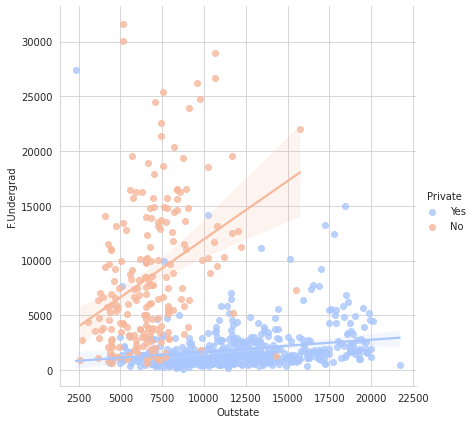

In [4]:
# Relação entre os estudantes full time e que moram fora do estado
# Nas escolas públicas a tendencia é que estudantes de outro estado estudam full time
sns.set_style('whitegrid')
sns.lmplot('Outstate','F.Undergrad',data=df, hue='Private',
           palette='coolwarm',size=6,aspect=1,fit_reg=True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


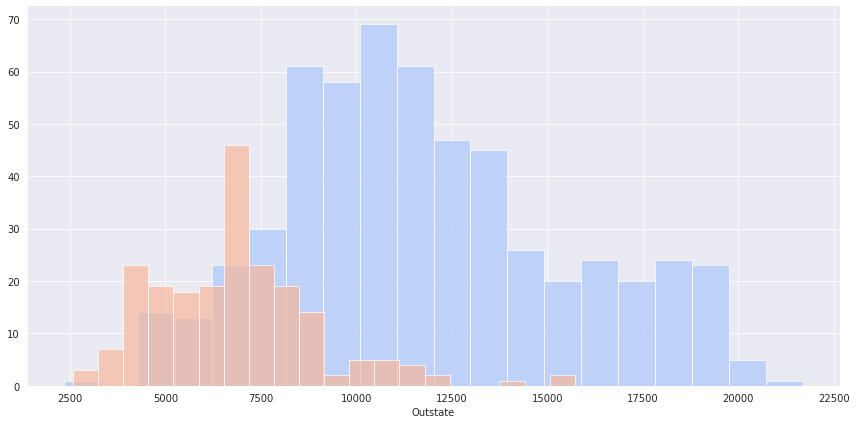

In [ ]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="Private",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,'Outstate',bins=20,alpha=0.7)

In [5]:
# algoritimo de clusters
from sklearn.cluster import KMeans

# Tentar identificar apenas 2 clusters (publico e privado)
model = KMeans(n_clusters=2)

# fit no modelo usando todos os dados exceto o se é privado ou público
# Não precisa de target (não supervisionado)
model.fit(df.drop("Private", axis=1))


KMeans(n_clusters=2)

In [6]:
# vetores centrais do modelo
model.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01]])

# Avaliação

In [10]:
# criar uma nova coluna "cluster" para comparar com o target
def converter_target(target):
  if target == "Yes":
    return 1
  else:
    return 0

df["Cluster"] = df["Private"].apply(converter_target)

In [12]:
df[["Private", "Cluster"]]

,Private,Cluster
Abilene Christian University,Yes,1
Adelphi University,Yes,1
Adrian College,Yes,1
Agnes Scott College,Yes,1
Alaska Pacific University,Yes,1
...,...,...
Worcester State College,No,0
Xavier University,Yes,1
Xavier University of Louisiana,Yes,1
Yale University,Yes,1


In [15]:
# avaliando os clusters do modelo com o target
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(df["Cluster"], model.labels_))

print(classification_report(df["Cluster"], model.labels_))


[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



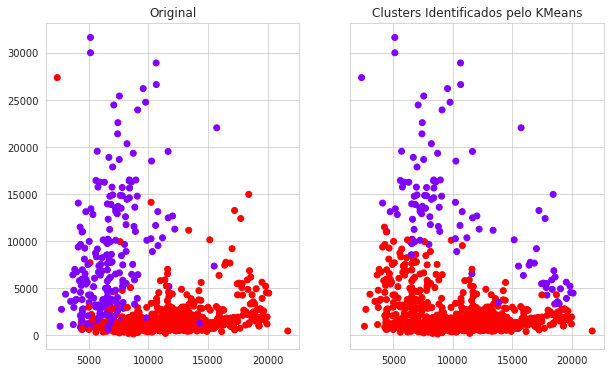

In [21]:
# Avaliando as classes do cluster vs as classes reais (privado ou publico)
# para os Outstate e F.Undergrad

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))

# Classes com dados reais (publico/privado)
ax1.set_title("Original")
ax1.scatter(df['Outstate'], df['F.Undergrad'], c=df["Cluster"], cmap='rainbow')

# Classes estimadas pelo algoritimo KMeans
ax2.set_title('Clusters Identificados pelo KMeans')
ax2.scatter(df['Outstate'], df['F.Undergrad'], c=model.labels_, cmap='rainbow')